In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 16 s


In [65]:
df = pd.concat([dSlow.head(100), dSlow.loc[dSlow.Label == 0].head(10)])

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 66, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 1}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 67, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 1}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 67, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 1, 1: 1}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 4.831474843281398.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 66, length of negative training set: 6
Optimal parameters are C=0.1 and class_weight={0: 3, 1: 1}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 67, length of negative training set: 7
Optimal parameters are C=0.1 and class_weight={0: 

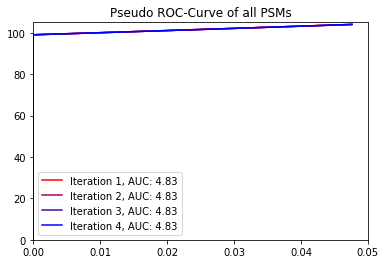

Wall time: 1.23 s


In [66]:
%%time

saveName = ''

p = percolator_experimental(df, idCol, features, plotSaveName = saveName, identsAsMetric = 'automatic', plotXLnXL = False)

0.9423076923076916

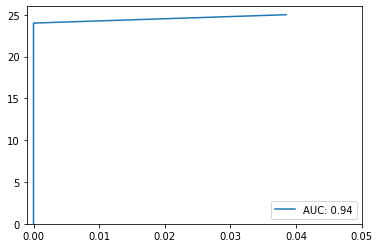

In [51]:
pseudoROC(df)